<a href="https://colab.research.google.com/github/brontominds/bounce.demo/blob/Ver0.01a/Combine_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import string
from matplotlib import rcParams

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df = pd.read_csv(r"reviews.csv", encoding ="latin-1") 

In [25]:
df.describe()
neg.describe()

,Review Upvotes
count,450.000000
mean,4.255556
std,7.040072
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,57.000000


In [0]:
neg=df[(df['Rating'] == 'Rated 1 stars out of five stars') | (df['Rating'] == 'Rated 2 stars out of five stars')|(df['Rating']=='Rated 3 stars out of five stars')]

In [0]:
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
wordnet_lemmatizer = WordNetLemmatizer()
stop = nltk.corpus.stopwords.words('english')
newStopWords = ['bikes','bounce','bike','even','finally','day','booking','id','still','one','never','ride','good','today','able','time']
stop.extend(newStopWords)
translate_table = dict((ord(char), " ") for char in string.punctuation)

In [0]:
def get_bitrigrams(full_text, threshold=30):
    if isinstance(full_text, str):
        text = full_text
    else:
        text = " ".join(full_text)
    bigram_measures = BigramAssocMeasures()
    trigram_measures = TrigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    bigrams = {" ".join(words): "_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}
    finder = TrigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    trigrams = {" ".join(words): "_".join(words)
                for words in finder.above_score(trigram_measures.likelihood_ratio, threshold)}
    return bigrams, trigrams

In [0]:
def replace_bitrigrams(text, bigrams, trigrams):
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text
    new_texts = []
    for t in texts:
        t_new = t
        for k, v in trigrams.items():
            t_new = t_new.replace(k, v)
        for k, v in bigrams.items():
            t_new = t_new.replace(" " + k + " ", " " + v + " ")
        new_texts.append(t_new)
    if len(new_texts) == 1:
        return new_texts[0]
    else:
        return new_texts

In [0]:
def use_ngrams_bigrams_trigrams(texts, lemmatizer, translate_table, stopw):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stopw))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    indexed_texts = []
    for doc in processed_texts:
        current_doc = []
        for k, v in trigrams.items():
            c = doc.count(k)
            if c > 0:
                current_doc += [v] * c
                doc = doc.replace(k, v)
        for k, v in bigrams.items():
            current_doc += [v] * doc.count(" " + k + " ")
        indexed_texts.append(" ".join(current_doc))
    return " ".join(indexed_texts)

In [0]:
def process_text(text, lemmatizer, translate_table, stopwords):
    processed_text = ""
    for sentence in sent_tokenize(text):
        tagged_sentence = pos_tag(word_tokenize(sentence.translate(translate_table)))
        for word, tag in tagged_sentence:
            word = word.lower()
            if word not in stopwords:
                if tag[0] != 'V':
                    processed_text += lemmatizer.lemmatize(word) + " "
    return processed_text

In [0]:
def get_all_processed_texts(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    #very_processed_texts = replace_bitrigrams(processed_texts, bigrams, trigrams)
    return " ".join(processed_texts)

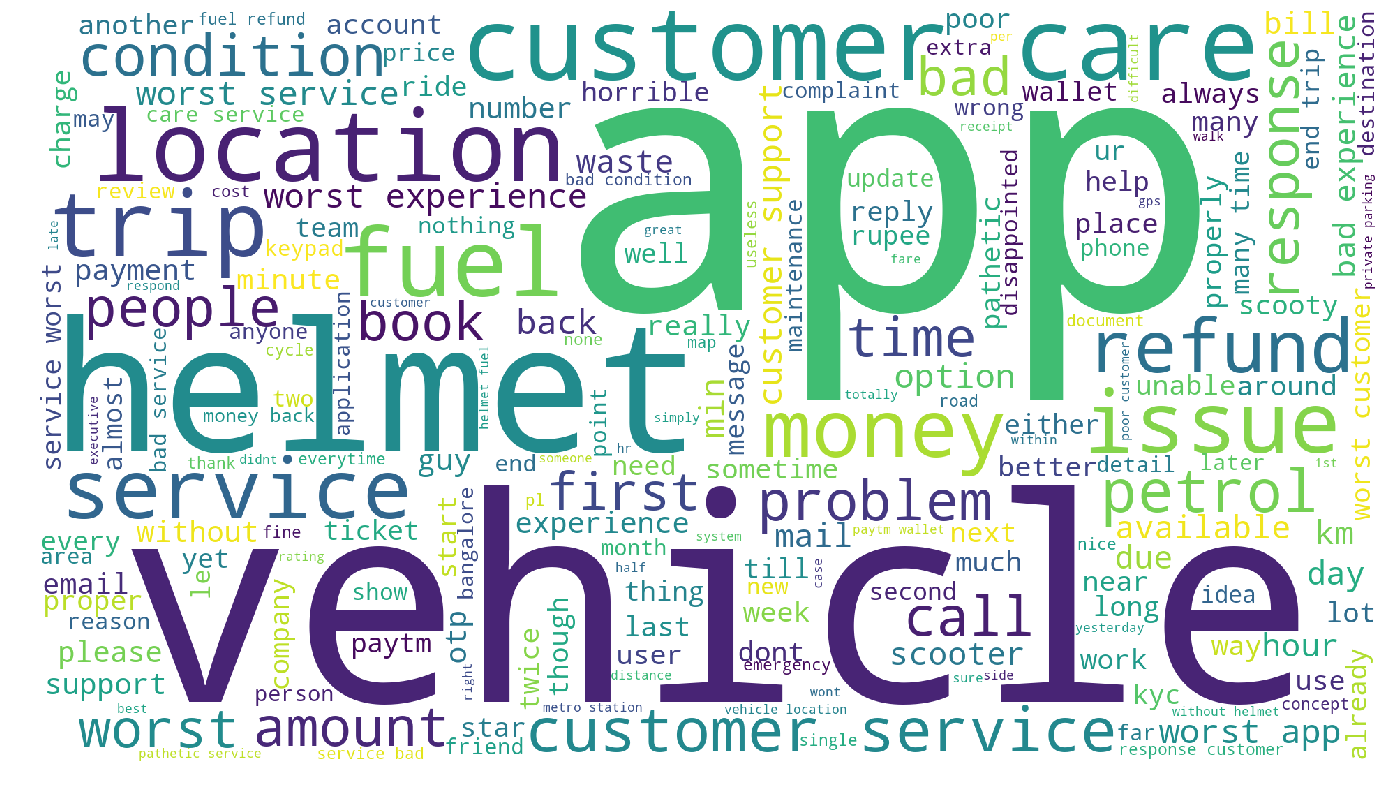

In [42]:
wordcloud = WordCloud(background_color="white", width=1920, height=1080).\
    generate(get_all_processed_texts(neg["ReviewTextFull"], wordnet_lemmatizer, translate_table, stop))
final=plt.figure(figsize=(24, 15))
plt.axis("off")
plt.imshow(wordcloud)
final.savefig('Cloud_Single.png')

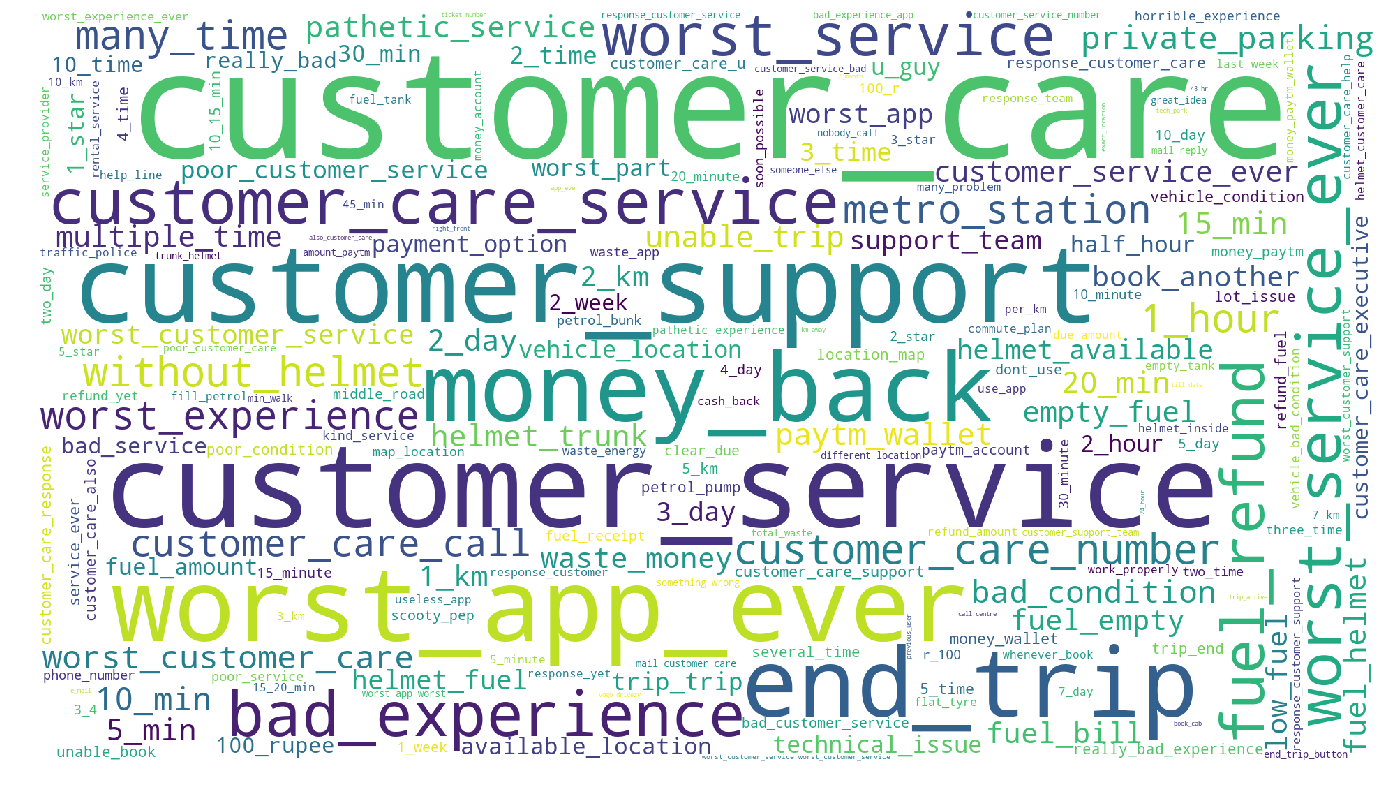

In [45]:
wordcloud = WordCloud(background_color="white", width=1920, height=1080).\
    generate(use_ngrams_bigrams_trigrams(neg["ReviewTextFull"], wordnet_lemmatizer, translate_table, stop))
final=plt.figure(figsize=(24, 15))
plt.axis("off")
plt.imshow(wordcloud)
final.savefig('Cloud_Multiple.png')